# Skill–Salary Relationship Analysis

This notebook analyzes the relationship between extracted skills and salary.
It focuses on whether skill depth and specific skills are associated with
higher compensation across job postings.


### Load Data

In [9]:
import pandas as pd
import ast

df = pd.read_csv("/content/combined_with_skills_norm_v1.csv")

def parse_skills(x):
    if isinstance(x, list):
        return x
    if isinstance(x, str):
        try:
            return ast.literal_eval(x)
        except:
            return []
    return []

df["skills_norm"] = df["skills_norm"].apply(parse_skills)


/tmp/ipython-input-3354267546.py:4: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/combined_with_skills_norm_v1.csv")


### Filter to Salary-Valid Rows

In [10]:
df["skill_count"] = df["skills_norm"].apply(len)

df_salary = df[
    (df["salary_final"].notna()) &
    (df["salary_final"] > 10000) &
    (df["skill_count"] > 0)
]


### Salary Vs Skill Count

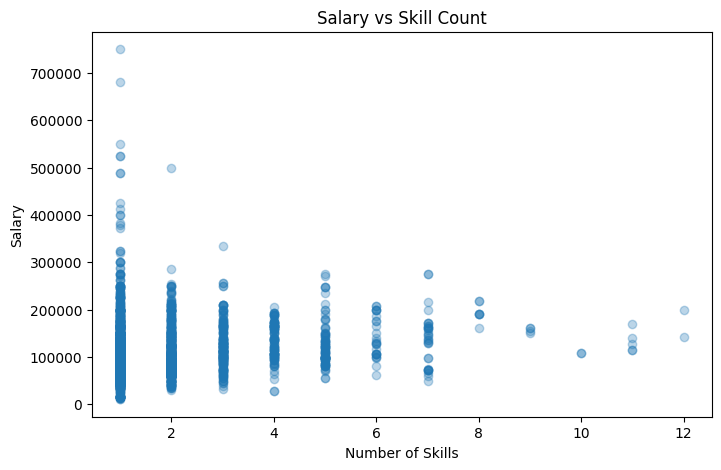

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(
    df_salary["skill_count"],
    df_salary["salary_final"],
    alpha=0.3
)
plt.xlabel("Number of Skills")
plt.ylabel("Salary")
plt.title("Salary vs Skill Count")
plt.show()


### Average Salary by Skill Count

In [12]:
salary_by_skills = (
    df_salary.groupby("skill_count")["salary_final"]
    .mean()
    .reset_index()
)

salary_by_skills = salary_by_skills[salary_by_skills["skill_count"] <= 15]


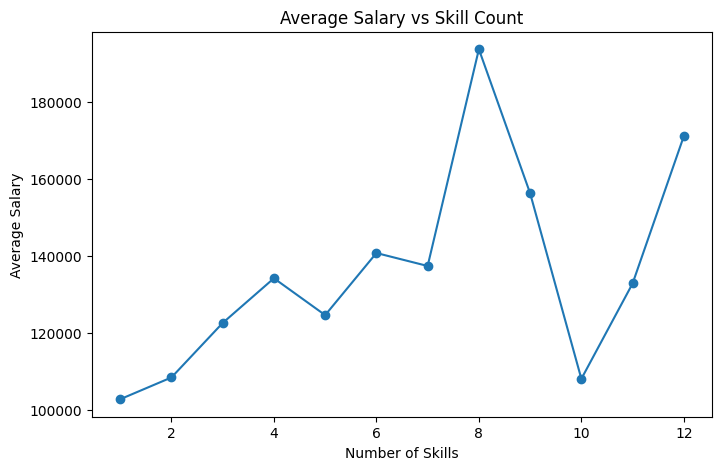

In [13]:
plt.figure(figsize=(8,5))
plt.plot(
    salary_by_skills["skill_count"],
    salary_by_skills["salary_final"],
    marker="o"
)
plt.xlabel("Number of Skills")
plt.ylabel("Average Salary")
plt.title("Average Salary vs Skill Count")
plt.show()


## High Paying Skills

### Explode Skills

In [14]:
df_exploded = df_salary.explode("skills_norm")


### Average Salary per skill

In [15]:
skill_salary = (
    df_exploded.groupby("skills_norm")["salary_final"]
    .mean()
    .reset_index()
)

skill_salary = skill_salary[
    skill_salary["skills_norm"].notna()
].sort_values("salary_final", ascending=False)


### Minimum Freqeuncy

In [16]:
skill_counts = df_exploded["skills_norm"].value_counts()
valid_skills = skill_counts[skill_counts >= 200].index

skill_salary = skill_salary[
    skill_salary["skills_norm"].isin(valid_skills)
]


### Highest Paying Skills

In [24]:
print("Number of skills after filtering:", len(skill_salary))
display(skill_salary.sort_values("salary_final", ascending=False).head(20))


Number of skills after filtering: 6


,skills_norm,salary_final
9,java,132300.018650
16,python,131677.845758
19,sql,124205.546962
8,git,114080.517686
0,aws,111278.740771
5,excel,99060.154228


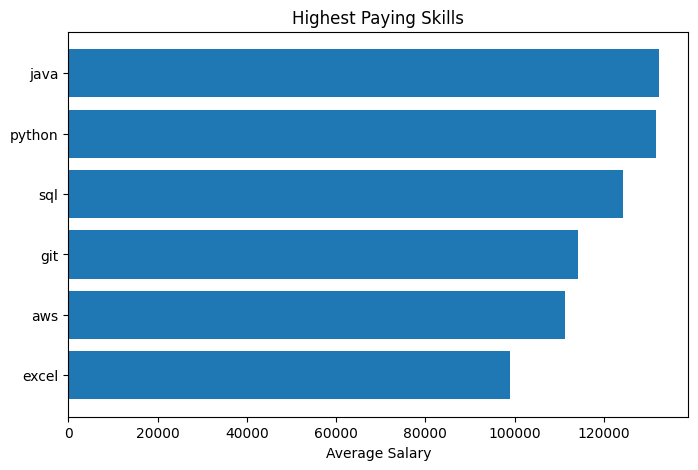

In [25]:
top_skills = skill_salary.head(10)

plt.figure(figsize=(8,5))
plt.barh(top_skills["skills_norm"], top_skills["salary_final"])
plt.xlabel("Average Salary")
plt.title("Highest Paying Skills")
plt.gca().invert_yaxis()
plt.savefig("highest_paying_skills.png", bbox_inches="tight")
plt.show()


## Interpretation

The chart shows the highest-paying skills based on average salary, given the current filters and data. A more precise interpretation would be:

Among skills that appear frequently enough in the dataset after cleaning, **Java** and **Python** are associated with the highest average salaries, followed by SQL, Git, AWS, and Excel. This suggests that backend and core data/programming skills dominate **higher-paying roles** in this dataset.

Important nuance:

- This is **average** salary, not **demand**.

- A skill can rank high because:

    - It appears in fewer but senior roles, or

    - It is commonly required in high-paying job families.

- This does not mean these are the top 6 most valuable skills overall—only within the filtered data.